In [ ]:
#necessary on linux/mac
#import multiprocessing

#if __name__ == '__main__':
#    multiprocessing.set_start_method('forkserver')

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score

import datetime
import matplotlib

import matplotlib.pyplot as plt

import DataPrep
import error_evaluation


In [49]:
dp = DataPrep.DataPrep()
X_Above_test, X_Above_train, y_Above_test, y_Above_train, X_Near_test, X_Near_train, y_Near_test, y_Near_train, X_Below_test, X_Below_train, y_Below_test, y_Below_train = dp.prep_day1_danger_train_test(input_file='../Data/V1.1FeaturesWithLabels20131201To20180430.csv', ignore_extreme=True, only_critical_points=False, oversample=False, only_precise_points = False, label_critical_points=True)
#X_Above_test_c, X_Above_train_c, y_Above_test_c, y_Above_train_c, X_Near_test_c, X_Near_train_c, y_Near_test_c, y_Near_train_c, X_Below_test_c, X_Below_train_c, y_Below_test_c, y_Below_train_c = dp.prep_day1_danger_train_test(input_file='../Data/V1.1FeaturesWithLabels20131201To20180430.csv', ignore_extreme=False, only_labels=['Considerable'], oversample=False, label_critical_points=True)
#X_Above_test_m, X_Above_train_m, y_Above_test_m, y_Above_train_m, X_Near_test_m, X_Near_train_m, y_Near_test_m, y_Near_train_m, X_Below_test_m, X_Below_train_m, y_Below_test_m, y_Below_train_m = dp.prep_day1_danger_train_test(input_file='../Data/V1.1FeaturesWithLabels20131201To20180430.csv', ignore_extreme=False, only_labels=['Moderate'], oversample=False, label_critical_points=True)
#X_Above_test_l, X_Above_train_l, y_Above_test_l, y_Above_train_l, X_Near_test_l, X_Near_train_l, y_Near_test_l, y_Near_train_l, X_Below_test_l, X_Below_train_l, y_Below_test_l, y_Below_train_l = dp.prep_day1_danger_train_test(input_file='../Data/V1.1FeaturesWithLabels20131201To20180430.csv', ignore_extreme=False, only_labels=['Low'], oversample=False, label_critical_points=True)

In [50]:
X_Above_train.head()

,n_f_APCPsurface1HourForecast,n_f_10mWindSpeed1HourForecast,n_f_APCPsurface2HourForecast,n_f_10mWindSpeed2HourForecast,n_f_APCPsurface3HourForecast,n_f_10mWindSpeed3HourForecast,n_f_APCPsurface4HourForecast,n_f_10mWindSpeed4HourForecast,n_f_APCPsurface5HourForecast,n_f_10mWindSpeed5HourForecast,...,c_r_Prev3DayWindSlabLikeliness9InPast,c_r_Prev7DayWindSlabLikeliness9InPast,c_r_Prev3DayFreezeThawLikeliness10InPast,c_r_Prev7DayFreezeThawLikeliness10InPast,c_r_Prev3DayWindSlabLikeliness10InPast,c_r_Prev7DayWindSlabLikeliness10InPast,c_IsCoastalSnowpack,c_IsContenentalSnowpack,DayOfYear,DayOfSeason
15880,0.628264,3.652883,1.396142,3.695755,2.393386,3.703395,3.290905,3.643193,3.988976,3.924486,...,0.0,0.004794,1.0,1.0,0.004729,0.004729,0.0,1.0,98.0,158.0
15881,0.628130,3.653000,1.395845,3.695912,2.392877,3.703584,3.290206,3.643544,3.988128,3.924838,...,0.0,0.005162,1.0,1.0,0.005093,0.005093,0.0,1.0,98.0,158.0
15884,0.627729,3.653352,1.394954,3.696383,2.391350,3.704152,3.288107,3.644596,3.985584,3.925894,...,0.0,0.006268,1.0,1.0,0.006184,0.006184,0.0,1.0,98.0,158.0
15885,0.627596,3.653469,1.394658,3.696539,2.390842,3.704341,3.287407,3.644947,3.984736,3.926246,...,0.0,0.006637,1.0,1.0,0.006548,0.006548,0.0,1.0,98.0,158.0
15886,0.627462,3.653586,1.394361,3.696696,2.390333,3.704530,3.286708,3.645297,3.983888,3.926598,...,0.0,0.007006,1.0,1.0,0.006912,0.006912,0.0,1.0,98.0,158.0


In [51]:
y_Near_train['UnifiedRegion'].value_counts()

Cascade West - North           11347
Olympics                       10010
Cascade West - South            9750
Cascade East - Central          9745
Cascade East - South            7924
Cascade East - North            6286
Cascade West - Central          4321
Uintas                          3766
Logan                           2655
Ogden                           2374
Cascade Pass - Snoq. Pass       2306
Salt Lake                       1621
Mt Hood                         1178
Skyline                         1166
Cascade Pass - Stevens Pass      389
Provo                            387
Name: UnifiedRegion, dtype: int64

In [52]:

m = RandomForestClassifier(n_jobs = -1,
                           oob_score=True,
                           n_estimators=50,
                           max_features="sqrt",
                           min_samples_leaf=3,                           
                           )
m.fit(X_Above_train.values, y_Above_train['o_Day1DangerAboveTreeline'].values.ravel())
m.score(X_Above_train.values, y_Above_train['o_Day1DangerAboveTreeline'].values.ravel())

0.9992821535393819

In [53]:
m.oob_score_

0.9527417746759721

In [54]:
preds = m.predict(X_Above_test)

In [55]:
preds[:10]

array(['Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate',
       'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate'],
      dtype=object)

In [56]:
m.classes_

array(['Considerable', 'High', 'Low', 'Moderate'], dtype=object)

In [57]:
m.score(X_Above_test, y_Above_test['o_Day1DangerAboveTreeline'].values.ravel())

0.5849050294275013

In [58]:
#only look at critical points
y_Above_test_crit = y_Above_test[y_Above_test['IsCriticalPoint']==True]
X_Above_test_crit = X_Above_test.loc[y_Above_test_crit.index, :]
preds_crit = m.predict(X_Above_test_crit)

In [59]:
#split in to forecast types
X_Above_test_cont = X_Above_test[X_Above_test['c_IsContenentalSnowpack']==True]
y_Above_test_cont = y_Above_test.loc[X_Above_test_cont.index, :]

X_Above_test_coast = X_Above_test[X_Above_test['c_IsCoastalSnowpack']==True]
y_Above_test_coast = y_Above_test.loc[X_Above_test_coast.index, :]

preds_cont = m.predict(X_Above_test_cont)
preds_coast = m.predict(X_Above_test_coast)

In [43]:
#probabiliites = m.predict_proba(X_Above_test)

In [44]:
 #y_Above_test['o_Day1DangerAboveTreeline'].reset_index(drop=True)

In [45]:
#pd.concat([pd.DataFrame(probabiliites),  y_Above_test['o_Day1DangerAboveTreeline'].reset_index(drop=True)], axis=1).to_csv("probs.csv")

Accuracy: 0.5848715890850722
Classification Report
              precision    recall  f1-score   support

Considerable       0.52      0.64      0.58     11976
        High       0.54      0.24      0.33      3845
         Low       0.00      0.00      0.00       736
    Moderate       0.66      0.67      0.66     13347

   micro avg       0.58      0.58      0.58     29904
   macro avg       0.43      0.39      0.39     29904
weighted avg       0.57      0.58      0.57     29904

Normalized confusion matrix
Confusion matrix, without normalization
Normalized confusion matrix
Confusion matrix, without normalization
Normalized confusion matrix
Confusion matrix, without normalization
Normalized confusion matrix
Confusion matrix, without normalization


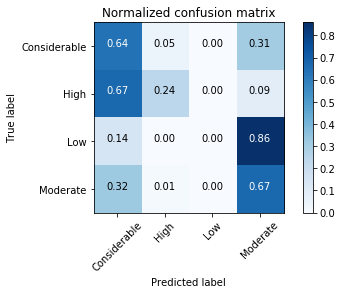

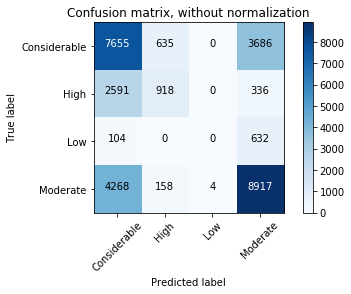

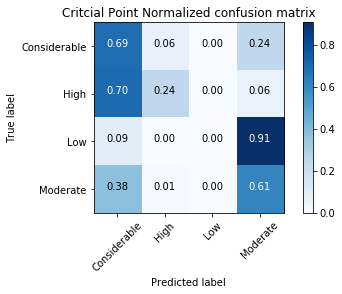

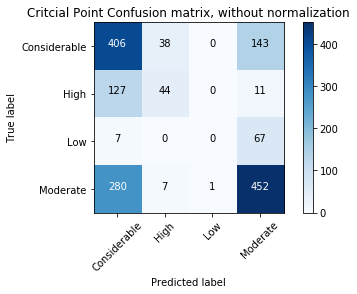

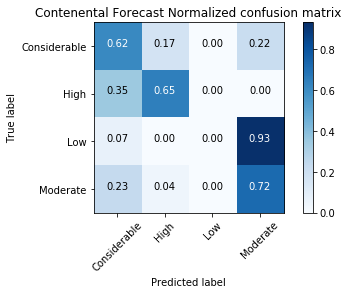

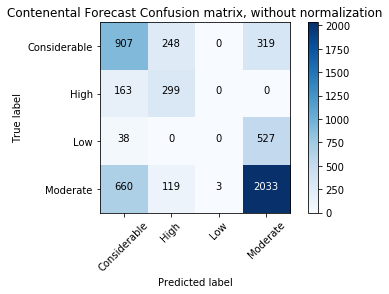

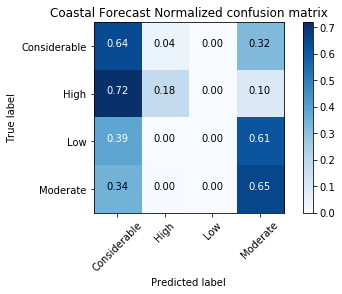

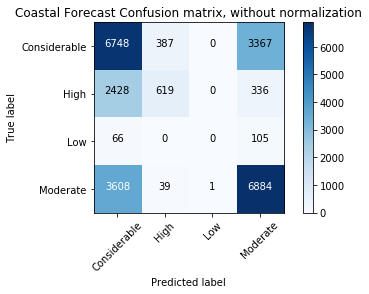

In [60]:
error_evaluation.evaluateSingleClassShort(y_Above_test['o_Day1DangerAboveTreeline'], preds)
cnf_matrix = confusion_matrix(y_Above_test['o_Day1DangerAboveTreeline'], preds)
plt.figure()
error_evaluation.plot_confusion_matrix(cnf_matrix, classes=['Considerable', 'High', 'Low', 'Moderate'], normalize=True,
                      title='Normalized confusion matrix')

plt.figure()
error_evaluation.plot_confusion_matrix(cnf_matrix, classes=['Considerable', 'High', 'Low', 'Moderate'],
                      title='Confusion matrix, without normalization')
plt.figure()
cnf_matrix_crit = confusion_matrix(y_Above_test_crit['o_Day1DangerAboveTreeline'], preds_crit)

error_evaluation.plot_confusion_matrix(cnf_matrix_crit, classes=['Considerable', 'High', 'Low', 'Moderate'], normalize=True,
                      title='Critcial Point Normalized confusion matrix')
plt.figure()
error_evaluation.plot_confusion_matrix(cnf_matrix_crit, classes=['Considerable', 'High', 'Low', 'Moderate'],
                      title='Critcial Point Confusion matrix, without normalization')

plt.figure()
cnf_matrix_cont = confusion_matrix(y_Above_test_cont['o_Day1DangerAboveTreeline'], preds_cont)

error_evaluation.plot_confusion_matrix(cnf_matrix_cont, classes=['Considerable', 'High', 'Low', 'Moderate'], normalize=True,
                      title='Contenental Forecast Normalized confusion matrix')
plt.figure()
error_evaluation.plot_confusion_matrix(cnf_matrix_cont, classes=['Considerable', 'High', 'Low', 'Moderate'],
                      title='Contenental Forecast Confusion matrix, without normalization')

plt.figure()
cnf_matrix_coast = confusion_matrix(y_Above_test_coast['o_Day1DangerAboveTreeline'], preds_coast)

error_evaluation.plot_confusion_matrix(cnf_matrix_coast, classes=['Considerable', 'High', 'Low', 'Moderate'], normalize=True,
                      title='Coastal Forecast Normalized confusion matrix')
plt.figure()
error_evaluation.plot_confusion_matrix(cnf_matrix_coast, classes=['Considerable', 'High', 'Low', 'Moderate'],
                      title='Coastal Forecast Confusion matrix, without normalization')
plt.show()

In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)
init_notebook_mode(connected=True)

In [ ]:
to_plot = y_Above_test[y_Above_test['o_Day1DangerAboveTreeline']=='High']

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lat = to_plot['Lat'].values,
        lon = to_plot['Lon'].values,
        text = 'High',
        mode = 'markers',
        marker = dict(
            size = 1,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = True,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            )
       
        ))]
layout = dict(
        title = 'Test Prediction Points',
        
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
iplot( fig )

In [ ]:
to_plot.to_csv("outsample.csv")

In [ ]:
importances = pd.Series(m.feature_importances_)
out = pd.concat([pd.Series(X_Above_train.columns), importances], axis=1)
out.columns=['Feature','Score']

In [ ]:
out.sort_values(by=['Score'], ascending=False)[:50]

In [ ]:
out.sort_values(by=['Score'], ascending=False).plot.barh()
plt.show()

In [ ]:
important_features= out[out['Score'] > .001].sort_values(by=['Score'], ascending=False)['Feature']

In [ ]:
X_Above_test_imp = X_Above_test[important_features]
X_Above_train_imp = X_Above_train[important_features]

In [ ]:
m2 = RandomForestClassifier(n_jobs = -1,
                           oob_score=True,
                           n_estimators=500,
                           max_features="sqrt",
                           min_samples_leaf=3,   
                           )
m2.fit(X_Above_train_imp.values, y_Above_train['o_Day1DangerAboveTreeline'].values.ravel())
m2.score(X_Above_train_imp.values, y_Above_train['o_Day1DangerAboveTreeline'].values.ravel())

In [ ]:
preds2 = m2.predict(X_Above_test_imp)

In [ ]:
error_evaluation.evaluateSingleClassShort(y_Above_test['o_Day1DangerAboveTreeline'], preds2)
cnf_matrix = confusion_matrix(y_Above_test['o_Day1DangerAboveTreeline'], preds2)
plt.figure()
error_evaluation.plot_confusion_matrix(cnf_matrix, classes=['Considerable', 'High', 'Low', 'Moderate'], normalize=True,
                      title='Normalized confusion matrix')

plt.figure()
error_evaluation.plot_confusion_matrix(cnf_matrix, classes=['Considerable', 'High', 'Low', 'Moderate'],
                      title='Confusion matrix, without normalization')
plt.show()

In [ ]:
importances2 = pd.Series(m2.feature_importances_)
out = pd.concat([pd.Series(X_Above_train_imp.columns), importances2], axis=1)
out.columns=['Feature','Score']

In [ ]:
out.sort_values(by=['Score'], ascending=False)[:10]

In [ ]:
out.sort_values(by=['Score'], ascending=False).plot.barh()
plt.show()

In [ ]:
import re
for x in range(1, 15):
    subset_cols = ['DayOfYear',
    'c_IsContenentalSnowpack',
    'c_IsCoastalSnowpack',
    'n_f_APCPsurface1HourForecast',
    'n_f_10mWindSpeed1HourForecast',
    'n_f_APCPsurface2HourForecast',
    'n_f_10mWindSpeed2HourForecast',
    'n_f_APCPsurface3HourForecast',
    'n_f_10mWindSpeed3HourForecast',
    'n_f_APCPsurface4HourForecast',
    'n_f_10mWindSpeed4HourForecast',
    'n_f_APCPsurface5HourForecast',
    'n_f_10mWindSpeed5HourForecast',
    'n_f_APCPsurface6HourForecast',
    'n_f_10mWindSpeed6HourForecast',
    'n_f_APCPsurface7HourForecast',
    'n_f_10mWindSpeed7HourForecast',
    'n_f_APCPsurface8HourForecast',
    'n_f_10mWindSpeed8HourForecast',
    'n_f_APCPsurface9HourForecast',
    'n_f_10mWindSpeed9HourForecast',
    'n_f_APCPsurface10HourForecast',
    'n_f_10mWindSpeed10HourForecast',
    'n_f_APCPsurface11HourForecast',
    'n_f_10mWindSpeed11HourForecast',
    'n_f_APCPsurface12HourForecast',
    'n_f_10mWindSpeed12HourForecast',
    'n_f_APCPsurface13HourForecast',
    'n_f_10mWindSpeed13HourForecast',
    'n_f_APCPsurface14HourForecast',
    'n_f_10mWindSpeed14HourForecast',
    'n_f_APCPsurface15HourForecast',
    'n_f_10mWindSpeed15HourForecast',
    'n_f_APCPsurface16HourForecast',
    'n_f_10mWindSpeed16HourForecast',
    'n_f_APCPsurface17HourForecast',
    'n_f_10mWindSpeed17HourForecast',
    'n_f_APCPsurface18HourForecast',
    'n_f_10mWindSpeed18HourForecast',
    'n_f_APCPsurface19HourForecast',
    'n_f_10mWindSpeed19HourForecast',
    'n_f_APCPsurface20HourForecast',
    'n_f_10mWindSpeed20HourForecast',
    'n_f_APCPsurface21HourForecast',
    'n_f_10mWindSpeed21HourForecast',
    'n_f_APCPsurface22HourForecast',
    'n_f_10mWindSpeed22HourForecast',
    'n_f_APCPsurface23HourForecast',
    'n_f_10mWindSpeed23HourForecast',
    'n_f_tempMaxF',
    'n_f_10mWindSpeedMax',
    'n_r_snowDepthIn',
    'n_f_tempMinF',
    'n_f_tempAveF',
    'n_f_10mWindSpeed',
    'n_f_APCPsurface',
    'n_r_precipIncrementSnowIn',
    'n_r_Prev3daySnowAccumulation',
    'n_r_Prev7daySnowAccumulation',
    'n_r_Prev3dayMaxTemp',
    'n_r_Prev3DayMax10mWind',
    'n_r_Prev3dayMinTemp',
    'n_r_Prev7dayMaxTemp',
    'n_r_Prev7DayMax10mWind',
    'n_r_Prev7dayMinTemp',
    'n_r_Prev1dayMaxTemp',
    'n_r_Prev1DayMax10mWind',
    'n_r_Prev1dayMinTemp',
    'n_r_Prev1DayPrecip',
    'n_f_Next24HourChangeInTempFromPrev3DayMax',
    'n_f_Next24HoursChangeInTempFromPrev1DayMax',
    'n_r_Prev24HoursPrecipAsRainTotalIn',
    'n_r_SNOWDAS_SnowDepth_mm',
    'n_r_SNOWDAS_SWE_mm',
    'n_r_SNOWDAS_SnowmeltRunoff_micromm',
    'n_r_SNOWDAS_Sublimation_micromm',
    'n_r_SNOWDAS_SolidPrecip_kgpersquarem',
    'n_r_SNOWDAS_LiquidPrecip_kgpersquarem',
    'n_r_SNOWDAS_SnowpackAveTemp_k']
    for y in range(1, x):
        day_regex = ""
        #print("loop x: " + str(x) + " y: " + str(y))
        expression = '.+\D'+str(y)+'InPast'
        #print("e:"+expression)
        day_regex = re.compile(expression)
        match_cols = list(filter(day_regex.match, cols))
        #print("match len: " + str(len(match_cols)))
        subset_cols = subset_cols + match_cols
    print("Have len: " + str(len(subset_cols)))
    ds = X_Near_train[subset_cols]
    ds_test = X_Near_test[subset_cols]
    m3 = RandomForestClassifier(n_jobs = -1,
                           oob_score=True,
                           n_estimators=500,
                           max_features="sqrt"
                           )
    m3.fit(ds.values, y_Near_train['o_Day1DangerNearTreeline'].values.ravel())
    preds3 = m3.predict(ds_test)
    error_evaluation.evaluateSingleClassShort(y_Near_test['o_Day1DangerNearTreeline'], preds3)
    
    

In [ ]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Author: Kian Ho <hui.kian.ho@gmail.com>
#         Gilles Louppe <g.louppe@gmail.com>
#         Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 Clause

print(__doc__)

RANDOM_STATE = 123

# Generate a binary classification dataset.
#X, y = make_classification(n_samples=500, n_features=25,
#                           n_clusters_per_class=1, n_informative=15,
#                           random_state=RANDOM_STATE)
X = X_Above_train
y = y_Above_train[yColumns]

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               n_jobs = 3,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               n_jobs = 3,
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               n_jobs=3,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 500

for label, clf in ensemble_clfs:
    i = min_estimators
    for i in range(min_estimators, max_estimators + 1, 25):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [ ]:

lat_lon_cache = pd.read_csv('../Data/LatLonCache.csv')
def find_nearest_forecast_point(row):
    
    tmp_lat_lon_cache = lat_lon_cache.copy()
   
    #TODO: currently a simple esitmate for converting lon to miles, 53 degrees per mile--need to do better for the real deal
    tmp_lat_lon_cache['distance'] = np.sqrt(np.square(69.0*(lat_lon_cache['Lat']-row['Lat'])) + np.square(53.0*(lat_lon_cache['Lon']-row['Lon'])))
    #tmp_lat_lon_cache['distance'] = tmp_lat_lon_cache[:3].apply(lambda x: estimate_distance_between_points_mi(lat, lon, x['Lat'], x['Lon']), axis=1)
    print("after distance calc")
    #nearest point needs to be within 20 miles
    nearest_row = tmp_lat_lon_cache.sort_values(by=['distance']).iloc[0, :]
    if nearest_row['distance'] > 20.0:
        #should never happen since our grid is smaller but just in case
        return -1, -1
    else:
        return nearest_row['Lat'], nearest_row['Lon']

In [ ]:
def is_critical_point(row, critical_points):
    for cp in critical_points:
        if(row['Lat'] == cp[0] and row['Lon'] == cp[1]):
            return True
    return False

lat_lon_cache = pd.read_csv('../Data/LatLonCache.csv')
critical_points = pd.read_csv('../Data/CriticalPointsToForecast.csv')
critical_forecast_points = critical_points.apply(find_nearest_forecast_point, axis=1)




        

In [ ]:

#X_Above_test, X_Above_train, y_Above_test, y_Above_train
tmp = y_Above_test.apply(lambda x: is_critical_point(x, critical_forecast_points), axis=1)


In [ ]:
tmp.value_counts()

In [ ]:
lat_lon_cache = pd.read_csv('../Data/LatLonCache.csv')

In [ ]:
critical_points = pd.read_csv('../Data/CriticalPointsToForecast.csv')

In [ ]:
lat_lon_cache.columns

In [ ]:
np.sqrt(np.square(69.0*(lat_lon_cache['Lat']-47.981010)) + np.square(53.0*(lat_lon_cache['Lon']--123.472400)))